In [3]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [5]:
# Descargar stopwords
nltk.download('stopwords');
nltk.download('punkt');
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
stop_words = set(stopwords.words('english'))

In [8]:
df = pd.read_csv('scopus.csv')
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Author Keywords,Index Keywords,Editors,Publisher,Language of Original Document,Document Type,Publication Stage,Open Access,Source,EID
0,Wang Y.; Zhao Y.; Liu L.; Chen Y.; Ai D.; Yao ...,"Wang, Yanqiu (57215441087); Zhao, Ying (587413...",57215441087; 58741373100; 57202217080; 5788877...,The current situation of internet addiction an...,2020,Psychiatry Investigation,17,3.0,NaN,237,...,Internet addition; Medical students; Self-harm...,adult; Article; automutilation; Chinese; contr...,NaN,Korean Neuropsychiatric Association,English,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85082796505
1,Wang J.-L.; Zhou X.-L.; Han C.; Wang M.-S.; Hu H.,"Wang, Jun-Li (59067969600); Zhou, Xiao-Lin (57...",59067969600; 57215336733; 57193837016; 5569561...,Prevalence of invasive aspergillosis in suspec...,2020,Epidemiology and Infection,NaN,NaN,NaN,NaN,...,Aspergillus; Cavity; Prevalence; Tuberculosis,NaN,NaN,Cambridge University Press,English,Article,Article in press,All Open Access; Gold Open Access,Scopus,2-s2.0-85097255985
2,Niu P.-P.; Wang X.; Xu Y.-M.,"Niu, Peng-Peng (55642567900); Wang, Xue (59072...",55642567900; 59072159600; 7406450867,Association of Interleukin-6 Signaling and C-R...,2021,Frontiers in Genetics,12,NaN,679363,NaN,...,C-reactive protein; inflammation; interleukin-...,C reactive protein; interleukin 6 receptor; ad...,NaN,Frontiers Media S.A.,English,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85108608803
3,Bakker M.K.; Kanning J.P.; Abraham G.; Martins...,"Bakker, Mark K. (57211076582); Kanning, Jos P....",57211076582; 57731906000; 26533966200; 5720720...,Genetic Risk Score for Intracranial Aneurysms:...,2023,Stroke,54,3.0,NaN,810,...,aneurysmal subarachnoid hemorrhage; genetic he...,Humans; Incidence; Intracranial Aneurysm; Risk...,NaN,Wolters Kluwer Health,English,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85149053073
4,Friedman D.Z.P.; Johnson B.K.; Beam E.; Kremer...,"Friedman, Daniel Z.P. (57210290389); Johnson, ...",57210290389; 57219112850; 55359296600; 7003306...,Risk Factors and Outcomes of Invasive Aspergil...,2023,Clinical Infectious Diseases,76,8.0,NaN,1431,...,Elixhauser Comorbidity Index; fungal infection...,Aspergillosis; Case-Control Studies; Graft Sur...,NaN,Oxford University Press,English,Article,Final,NaN,Scopus,2-s2.0-85152631678


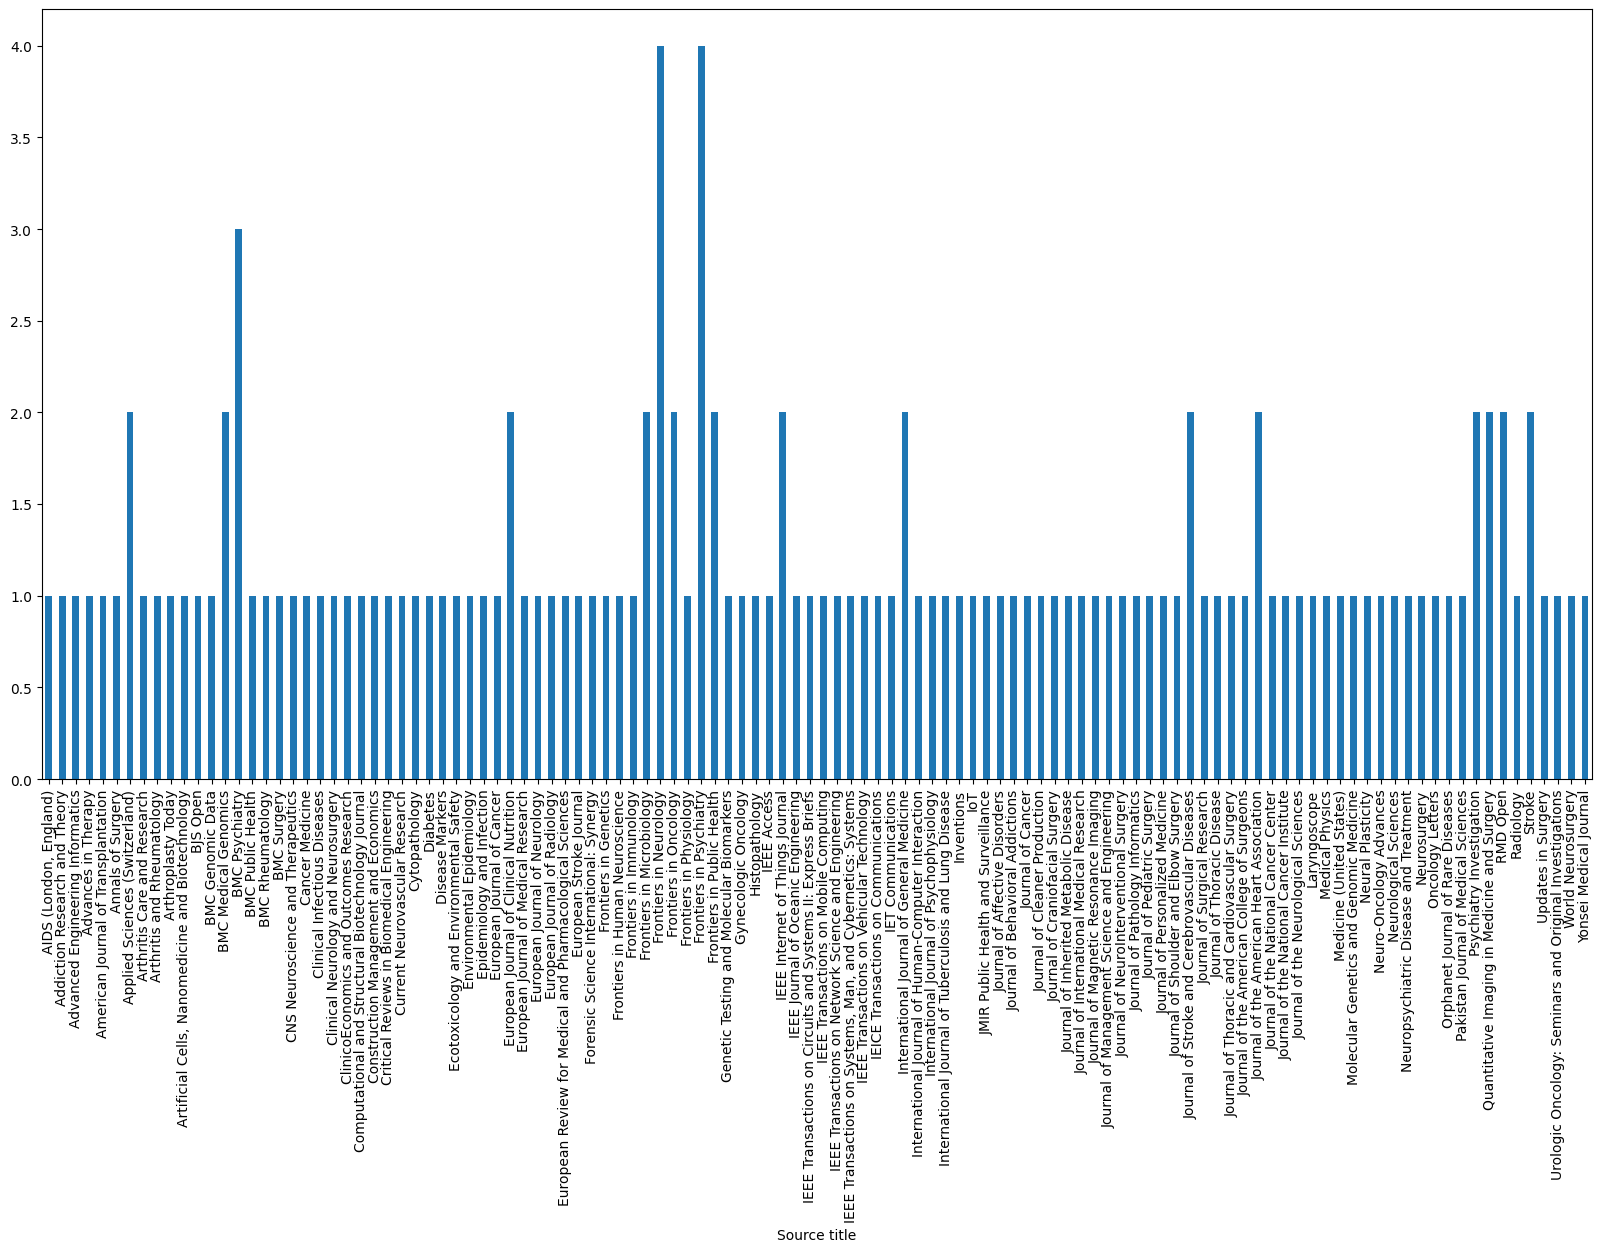

In [9]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(20, 10))
grouped.plot(kind='bar')
plt.show()

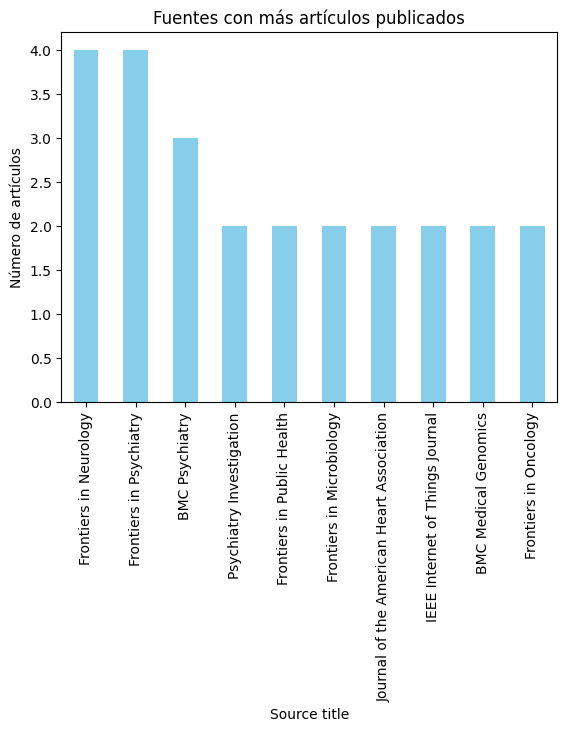

In [10]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(10)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [11]:
# Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Analizar Titulos

In [12]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

,Word,Frequency,Rank
0,intracranial,36,1.0
1,analysis,36,1.0
2,study,25,2.0
3,aneurysm,25,2.0
4,ia,19,3.0
5,internet,16,4.0
6,addiction,16,4.0
7,stage,15,5.0
8,patients,15,5.0
9,aneurysms,14,6.0


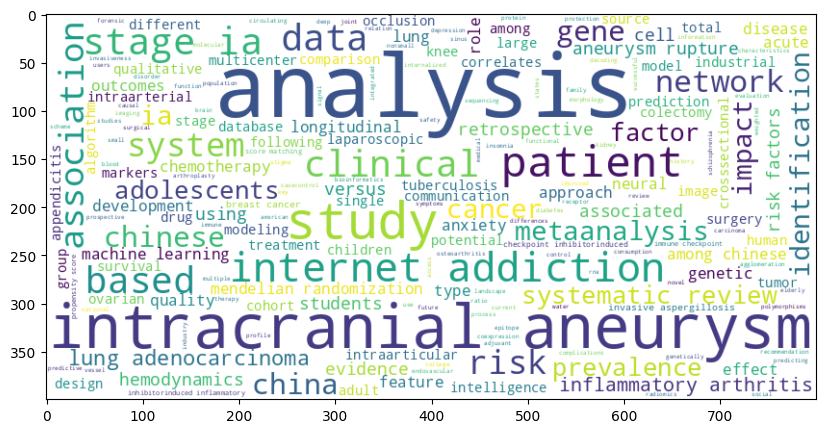

In [13]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

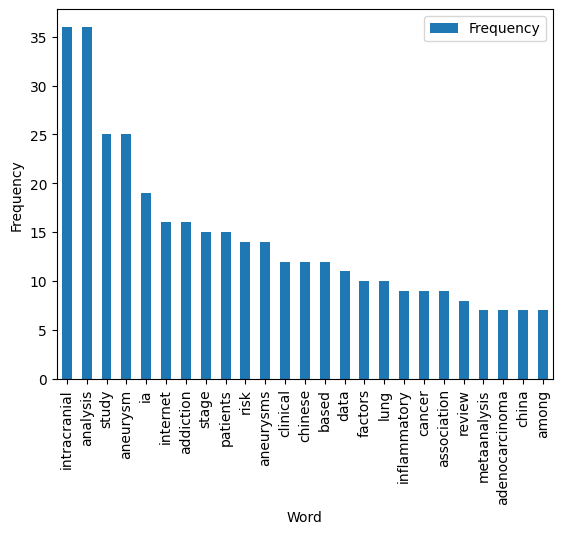

In [14]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-15-63b504922288>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


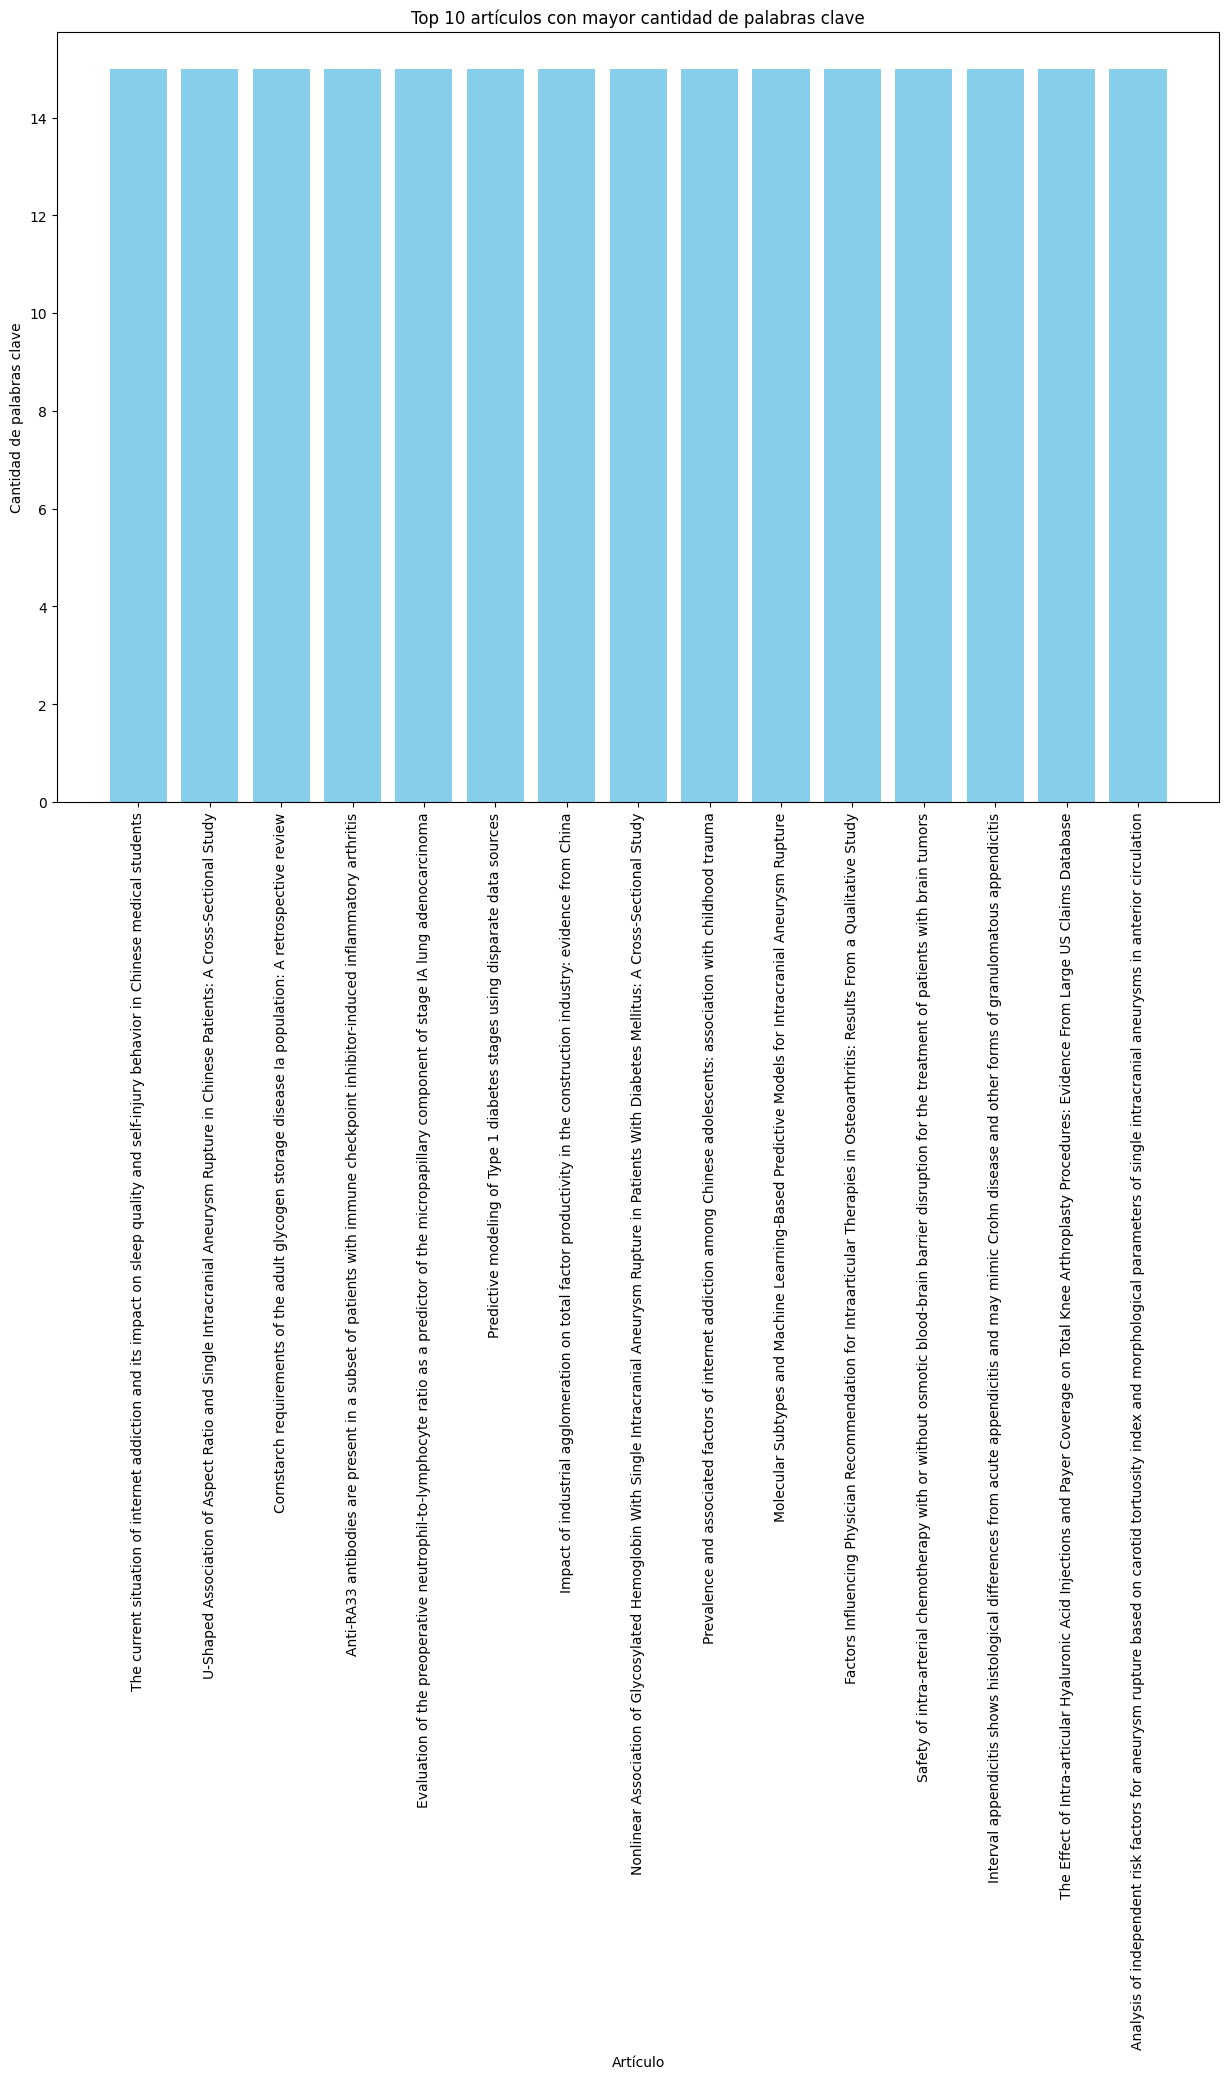

In [15]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(15, 10))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

# ANALIZAR ABSTRACT

In [16]:
# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(10)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")


Resumen 1:
The Young’s Internet Addiction Test, Pittsburgh Sleep Quality Index (PSQI), Self-Harm Questionnaire were used in this cross-sectional survey. A total of 3,738 medical students were investigated, 1,552 (41.52%) males, 2,186 (58.48%) females. Females, higher grade students had a higher IA detection rate.

Resumen 2:
Therefore, the study aimed to derive a more detailed estimation of this association between AR and ruptured IA in Chinese IA patients. Methods: The present work was a cross-sectional study. We retrospectively collected 1,588 Chinese patients with a single IA from January 2010 to November 2017.

Resumen 3:
When cornstarch was first described as a treatment, few people survived beyond early childhood. The required number of doses, however, did not change with a mean of six doses (range 4-8) daily in all age groups. The data demonstrate that adult treatment needs vary greatly from younger age groups, and the required cornstarch support decreases with age (P <.001).

R

In [17]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")


Title: The current situation of internet addiction and its impact on sleep quality and self-injury behavior in Chinese medical students
Summary: The Young’s Internet Addiction Test, Pittsburgh Sleep Quality Index (PSQI), Self-Harm Questionnaire were used in this cross-sectional survey. A total of 3,738 medical students were investigated, 1,552 (41.52%) males, 2,186 (58.48%) females.

Title: Predictive modeling of Type 1 diabetes stages using disparate data sources
Summary: This study aims to model genetic, immunologic, metabolomics, and proteomic biomarkers for development of islet autoimmunity (IA) and progression to type 1 diabetes in a prospective high-risk cohort. This proof-of-principle analysis is the first study to integrate large, diverse biomarker data sets into a limited number of features, highlighting differences in pathways leading to IA from those predicting progression to diabetes.

Title: Prevalence, demographics and clinical characteristics of Internet addiction among 

<ipython-input-23-b453cffdecc5>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama


<Figure size 1500x1000 with 0 Axes>

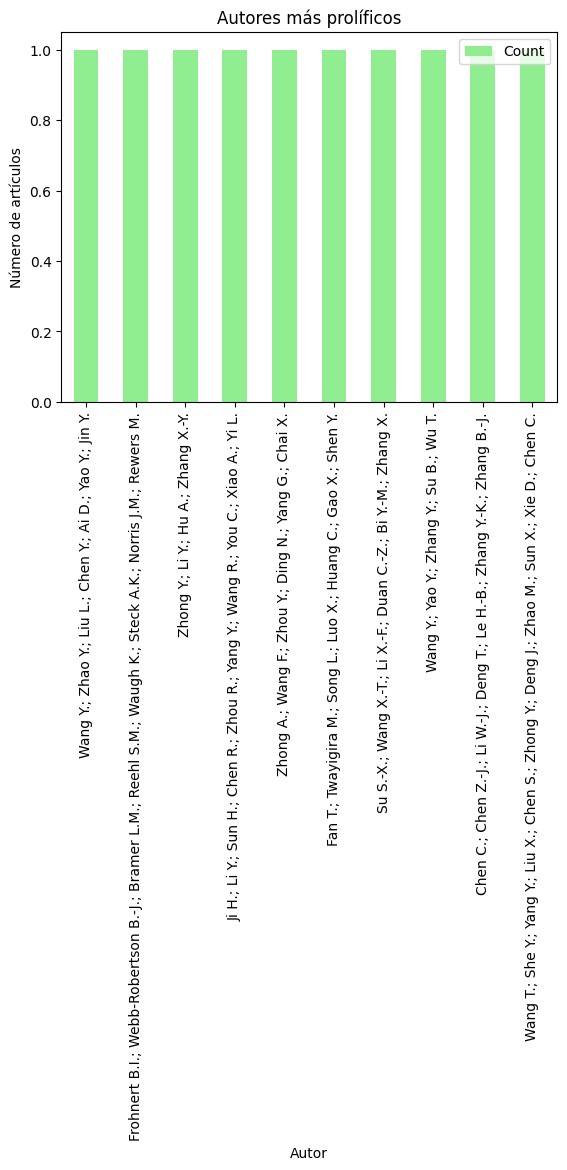

In [23]:
# Contar los artículos por autor
author_counts = df['Authors'].str.split(', ').explode().value_counts().reset_index()
author_counts.columns = ['Author', 'Count']

# Mostrar los autores más prolíficos
top_authors = author_counts.head(10)
plt.figure(figsize=(15, 10))
top_authors.plot(kind='bar', x='Author', y='Count', color='lightgreen')
plt.title('Autores más prolíficos')
plt.xlabel('Autor')
plt.ylabel('Número de artículos')

# Ajustar las etiquetas de los ejes x
plt.xticks(rotation=90, ha='center')
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()


In [36]:
df1 = pd.read_csv('scopus2.csv')
df1.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Author Keywords,Index Keywords,Editors,Publisher,Language of Original Document,Document Type,Publication Stage,Open Access,Source,EID
0,Chen W.; Zhao L.; Wang J.; Guo W.-L.,"Chen, Wei (57217701575); Zhao, Lian (572193424...",57217701575; 57219342463; 56183176100; 3766490...,Hepatic vascular variations and visual three-d...,2020,Surgical and Radiologic Anatomy,42.0,12.0,NaN,1489,...,Choledochal cyst; Hepatic vascular variation; ...,"Anatomic Variation; Child; Child, Preschool; C...",NaN,Springer-Verlag Italia s.r.l.,English,Article,Final,NaN,Scopus,2-s2.0-85092297120
1,Wu S.-G.; Wang J.; Lian C.-L.; Lei J.; Hua L.;...,"Wu, San-Gang (39162370200); Wang, Jun (5720490...",39162370200; 57204905842; 57210841562; 5721410...,Evaluation of the 8th edition of the American ...,2020,Breast,51.0,NaN,NaN,2,...,AJCC; Breast cancer; Chemotherapy; Mastectomy;...,"Adult; Aged; Aged, 80 and over; Breast Neoplas...",NaN,Churchill Livingstone,English,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85081257135
2,Wang Y.; Zhao Y.; Liu L.; Chen Y.; Ai D.; Yao ...,"Wang, Yanqiu (57215441087); Zhao, Ying (587413...",57215441087; 58741373100; 57202217080; 5788877...,The current situation of internet addiction an...,2020,Psychiatry Investigation,17.0,3.0,NaN,237,...,Internet addition; Medical students; Self-harm...,adult; Article; automutilation; Chinese; contr...,NaN,Korean Neuropsychiatric Association,English,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85082796505
3,Grosu H.B.; Manzanera A.; Shivakumar S.; Sun S...,"Grosu, Horiana B. (37060955400); Manzanera, An...",37060955400; 53164484400; 23061892000; 5721237...,Survival disparities following surgery among p...,2020,Lung Cancer,140.0,NaN,NaN,55,...,Lung cancer histology; Non–small cell lung cancer,"Adenocarcinoma of Lung; Adult; Aged; Aged, 80 ...",NaN,Elsevier Ireland Ltd,English,Article,Final,NaN,Scopus,2-s2.0-85076520605
4,Wang J.-L.; Zhou X.-L.; Han C.; Wang M.-S.; Hu H.,"Wang, Jun-Li (59067969600); Zhou, Xiao-Lin (57...",59067969600; 57215336733; 57193837016; 5569561...,Prevalence of invasive aspergillosis in suspec...,2020,Epidemiology and Infection,NaN,NaN,NaN,NaN,...,Aspergillus; Cavity; Prevalence; Tuberculosis,NaN,NaN,Cambridge University Press,English,Article,Article in press,All Open Access; Gold Open Access,Scopus,2-s2.0-85097255985


In [37]:
# Aplicar la limpieza de texto a los títulos
df1['clean_title'] = df1['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df1['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df1 = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df1 = word_df1.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df1['Rank'] = word_df1['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df1.head(20)

,Word,Frequency,Rank
0,cancer,25,1.0
1,analysis,24,2.0
2,study,21,3.0
3,patients,20,4.0
4,stage,15,5.0
5,intracranial,13,6.0
6,lung,13,6.0
7,clinical,12,7.0
8,aneurysm,12,7.0
9,ia,11,8.0


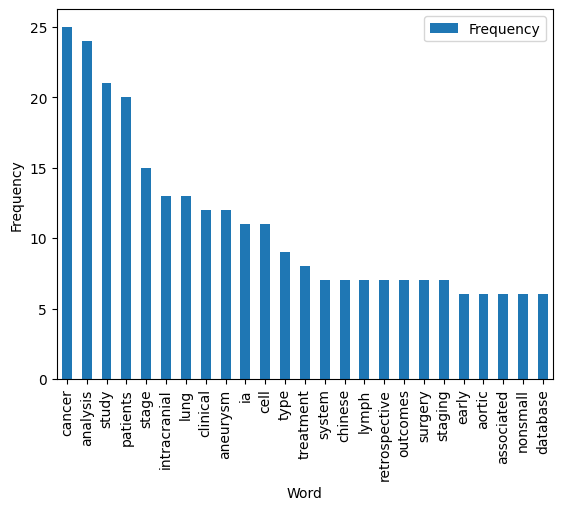

In [38]:
import matplotlib.pyplot as plt
word_df1.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: no numeric data to plot

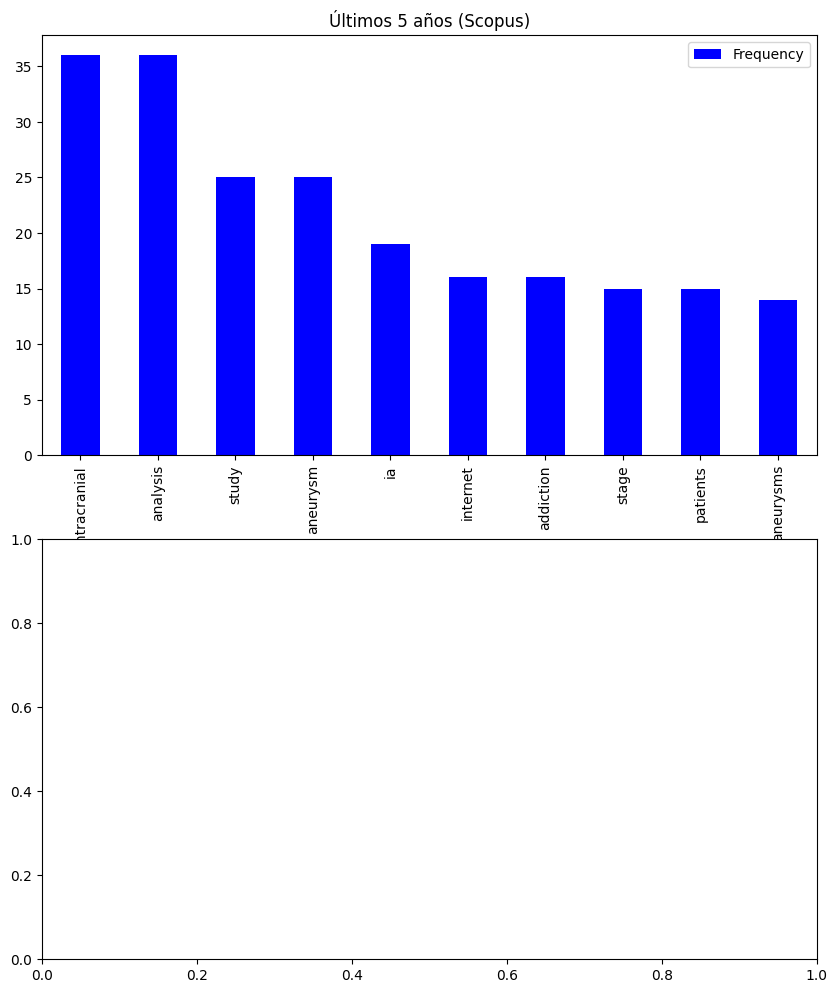

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords

# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Cargar los archivos CSV de Scopus y Scopus2
df = pd.read_csv('scopus.csv')
df1 = pd.read_csv('scopus2.csv')

# Asumimos que hay una columna 'Year' en el DataFrame y convertimos a año
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year
df1['Year'] = pd.to_datetime(df1['Year'], errors='coerce').dt.year

# Limpiar títulos en ambos DataFrames
df['clean_title'] = df['Title'].apply(clean_text)
df1['clean_title'] = df1['Title'].apply(clean_text)

# Dividir en dos periodos: últimos 5 años y 5 años anteriores para ambos DataFrames
recent_period = df[df['Year'] >= (df['Year'].max() - 5)]
earlier_period = df[(df['Year'] < (df['Year'].max() - 5)) & (df['Year'] >= (df['Year'].max() - 10))]

recent_period1 = df1[df1['Year'] >= (df1['Year'].max() - 5)]
earlier_period1 = df1[(df1['Year'] < (df1['Year'].max() - 5)) & (df1['Year'] >= (df1['Year'].max() - 10))]

# Analizar palabras clave en los dos periodos para ambos DataFrames
recent_word_counts = Counter()
recent_period['clean_title'].str.split().apply(recent_word_counts.update)

earlier_word_counts = Counter()
earlier_period['clean_title'].str.split().apply(earlier_word_counts.update)

recent_word_counts1 = Counter()
recent_period1['clean_title'].str.split().apply(recent_word_counts1.update)

earlier_word_counts1 = Counter()
earlier_period1['clean_title'].str.split().apply(earlier_word_counts1.update)

# Crear DataFrames de frecuencias de palabras para ambos DataFrames
recent_word_df = pd.DataFrame(recent_word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
earlier_word_df = pd.DataFrame(earlier_word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

recent_word_df1 = pd.DataFrame(recent_word_counts1.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
earlier_word_df1 = pd.DataFrame(earlier_word_counts1.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Graficar comparación para Scopus
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Gráfica para el periodo más reciente de Scopus
recent_word_df.head(10).plot(kind='bar', x='Word', y='Frequency', ax=axes[0], title='Últimos 5 años (Scopus)', color='blue')

# Gráfica para el periodo de 5 años anteriores de Scopus
earlier_word_df1.head(10).plot(kind='bar', x='Word', y='Frequency', ax=axes[1], title='5 años anteriores (Scopus)', color='red')

plt.tight_layout()
plt.show()

# Graficar comparación para Scopus2
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Gráfica para el periodo más reciente de Scopus2
recent_word_df1.head(10).plot(kind='bar', x='Word', y='Frequency', ax=axes[0], title='Últimos 5 años (Scopus2)', color='green')

# Gráfica para el periodo de 5 años anteriores de Scopus2
earlier_word_df1.head(10).plot(kind='bar', x='Word', y='Frequency', ax=axes[1], title='5 años anteriores (Scopus2)', color='orange')

plt.tight_layout()
plt.show()



<Figure size 1500x1000 with 0 Axes>

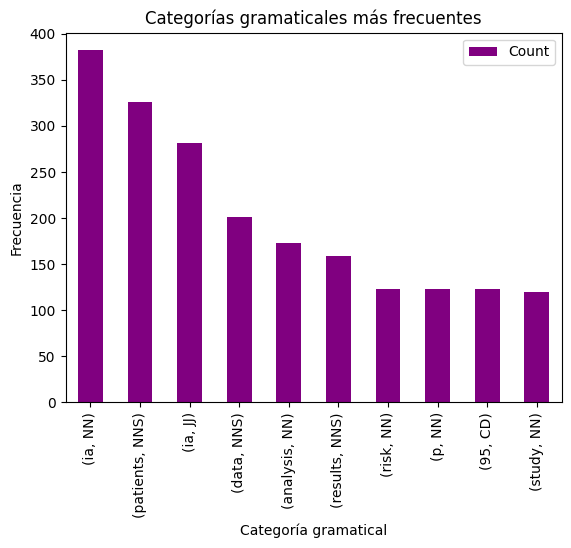

In [22]:
from nltk import pos_tag

# Etiquetar palabras en los resúmenes
df['pos_tags'] = df['Abstract'].apply(lambda x: pos_tag(word_tokenize(clean_text(x))) if pd.notnull(x) else [])

# Contar categorías gramaticales
pos_counts = Counter()
df['pos_tags'].apply(pos_counts.update)

# Crear DataFrame para visualizar
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count']).sort_values(by='Count', ascending=False)

# Graficar categorías gramaticales más frecuentes
plt.figure(figsize=(15, 10))
pos_df.head(10).plot(kind='bar', x='POS', y='Count', color='purple')
plt.title('Categorías gramaticales más frecuentes')
plt.xlabel('Categoría gramatical')
plt.ylabel('Frecuencia')
plt.show()


<Figure size 1500x1000 with 0 Axes>

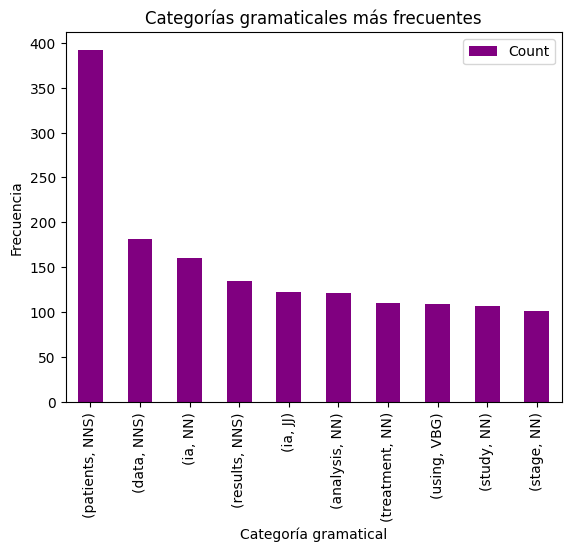

In [42]:
from nltk import pos_tag

# Etiquetar palabras en los resúmenes
df1['pos_tags'] = df1['Abstract'].apply(lambda x: pos_tag(word_tokenize(clean_text(x))) if pd.notnull(x) else [])

# Contar categorías gramaticales
pos_counts = Counter()
df1['pos_tags'].apply(pos_counts.update)

# Crear DataFrame para visualizar
pos_df1 = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count']).sort_values(by='Count', ascending=False)

# Graficar categorías gramaticales más frecuentes
plt.figure(figsize=(15, 10))
pos_df1.head(10).plot(kind='bar', x='POS', y='Count', color='purple')
plt.title('Categorías gramaticales más frecuentes')
plt.xlabel('Categoría gramatical')
plt.ylabel('Frecuencia')
plt.show()